In [842]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce
import seaborn as sns

### LECTURA DATOS

In [843]:
#mysql_config = {
#    'host': 'localhost',
#    'user': 'root',
#    'database': 'cancer_mama'
#}

#conn_mysql = mysql.connector.connect(**mysql_config)
#cursor_mysql = conn_mysql.cursor()

#query = "SELECT * FROM tumor;"
#df_sql = pd.read_sql_query(query, conn_mysql)

In [844]:
# PARA MAC
# df_sql = pd.read_csv('./Datos/datos_sql.csv')
# df_sql = df_sql.drop('Unnamed: 0',axis=1)
# df_sql

In [845]:
df_csv1 = pd.read_csv('./Datos/patients_batch1.csv')
df_csv2 = pd.read_csv('./Datos/patients_batch2.csv')
df_excel = pd.read_excel('./Datos/gynecological.xlsx')
df_excel = df_excel.drop('Unnamed: 0', axis=1)
df_json = pd.read_json('./Datos/histochemistry.json')
df_sql = pd.read_csv('./Datos/datos_sql.csv')
df_sql = df_sql.drop('Unnamed: 0', axis=1)

# PREPROCESADO

### Preprocesado gynecological


In [846]:
df_excel

,ehr,pregnancy,birth,caesarean,abort,menarche_age,menopause_age
0,10011773,-8.0,0.0,NaN,0.0,NaN,71.0
1,10030299,3.0,NaN,0.0,0.0,NaN,NaN
2,10030824,0.0,0.0,0.0,NaN,NaN,44.0
3,10053435,2.0,NaN,0.0,1.0,21.0,74.0
4,10111454,0.0,-6.0,NaN,0.0,16.0,55.0
...,...,...,...,...,...,...,...
7681,99948591,9.0,2.0,-4.0,0.0,12.0,47.0
7682,99961100,2.0,2.0,0.0,0.0,19.0,52.0
7683,99981192,3.0,3.0,0.0,-5.0,11.0,NaN
7684,99992350,4.0,3.0,NaN,-6.0,11.0,55.0


In [847]:
df = df_excel

In [848]:
nulos = df.isnull()

num_nulos_por_columna = nulos.sum()

print("Número de valores nulos por columna:")
print(num_nulos_por_columna)


Número de valores nulos por columna:
ehr                 0
pregnancy        1273
birth            1269
caesarean        1555
abort            1451
menarche_age     2785
menopause_age    3200
dtype: int64


Imputamos los nulos de pregnancy, que es la suma de las otras 3 variables restantes, birth,caesarean y abort.

In [849]:
def imputar_pregnancy(row):
    if pd.isnull(row['pregnancy']):
        return row['birth'] + row['caesarean'] + row['abort']
    else:
        return row['pregnancy']

In [850]:
df['pregnancy'] = df.apply(imputar_pregnancy, axis=1)
df


,ehr,pregnancy,birth,caesarean,abort,menarche_age,menopause_age
0,10011773,-8.0,0.0,NaN,0.0,NaN,71.0
1,10030299,3.0,NaN,0.0,0.0,NaN,NaN
2,10030824,0.0,0.0,0.0,NaN,NaN,44.0
3,10053435,2.0,NaN,0.0,1.0,21.0,74.0
4,10111454,0.0,-6.0,NaN,0.0,16.0,55.0
...,...,...,...,...,...,...,...
7681,99948591,9.0,2.0,-4.0,0.0,12.0,47.0
7682,99961100,2.0,2.0,0.0,0.0,19.0,52.0
7683,99981192,3.0,3.0,0.0,-5.0,11.0,NaN
7684,99992350,4.0,3.0,NaN,-6.0,11.0,55.0


In [851]:
nulos = df.isnull()

num_nulos_por_columna = nulos.sum()

print("Número de valores nulos por columna:")
print(num_nulos_por_columna)


Número de valores nulos por columna:
ehr                 0
pregnancy         442
birth            1269
caesarean        1555
abort            1451
menarche_age     2785
menopause_age    3200
dtype: int64


In [852]:
# Imputar valores nulos en la columna "birth"
def imputar_birth(row):
    if pd.isnull(row['birth']):
        return row['pregnancy'] - (row['caesarean'] + row['abort'])
    else:
        return row['birth']

# Aplicar la función a cada fila del DataFrame
df['birth'] = df.apply(imputar_birth, axis=1)

df

,ehr,pregnancy,birth,caesarean,abort,menarche_age,menopause_age
0,10011773,-8.0,0.0,NaN,0.0,NaN,71.0
1,10030299,3.0,3.0,0.0,0.0,NaN,NaN
2,10030824,0.0,0.0,0.0,NaN,NaN,44.0
3,10053435,2.0,1.0,0.0,1.0,21.0,74.0
4,10111454,0.0,-6.0,NaN,0.0,16.0,55.0
...,...,...,...,...,...,...,...
7681,99948591,9.0,2.0,-4.0,0.0,12.0,47.0
7682,99961100,2.0,2.0,0.0,0.0,19.0,52.0
7683,99981192,3.0,3.0,0.0,-5.0,11.0,NaN
7684,99992350,4.0,3.0,NaN,-6.0,11.0,55.0


In [853]:
def imputar_caesarean(row):
    if pd.isnull(row['caesarean']):
        return row['pregnancy'] - (row['birth'] + row['abort'])
    else:
        return row['birth']

# Aplicar la función a cada fila del DataFrame
df['caesarean'] = df.apply(imputar_caesarean, axis=1)

df

,ehr,pregnancy,birth,caesarean,abort,menarche_age,menopause_age
0,10011773,-8.0,0.0,-8.0,0.0,NaN,71.0
1,10030299,3.0,3.0,3.0,0.0,NaN,NaN
2,10030824,0.0,0.0,0.0,NaN,NaN,44.0
3,10053435,2.0,1.0,1.0,1.0,21.0,74.0
4,10111454,0.0,-6.0,6.0,0.0,16.0,55.0
...,...,...,...,...,...,...,...
7681,99948591,9.0,2.0,2.0,0.0,12.0,47.0
7682,99961100,2.0,2.0,2.0,0.0,19.0,52.0
7683,99981192,3.0,3.0,3.0,-5.0,11.0,NaN
7684,99992350,4.0,3.0,7.0,-6.0,11.0,55.0


In [854]:
def imputar_abort(row):
    if pd.isnull(row['abort']):
        return row['pregnancy'] - (row['caesarean'] + row['birth'])
    else:
        return row['abort']

# Aplicar la función a cada fila del DataFrame
df['abort'] = df.apply(imputar_abort, axis=1)

df

,ehr,pregnancy,birth,caesarean,abort,menarche_age,menopause_age
0,10011773,-8.0,0.0,-8.0,0.0,NaN,71.0
1,10030299,3.0,3.0,3.0,0.0,NaN,NaN
2,10030824,0.0,0.0,0.0,0.0,NaN,44.0
3,10053435,2.0,1.0,1.0,1.0,21.0,74.0
4,10111454,0.0,-6.0,6.0,0.0,16.0,55.0
...,...,...,...,...,...,...,...
7681,99948591,9.0,2.0,2.0,0.0,12.0,47.0
7682,99961100,2.0,2.0,2.0,0.0,19.0,52.0
7683,99981192,3.0,3.0,3.0,-5.0,11.0,NaN
7684,99992350,4.0,3.0,7.0,-6.0,11.0,55.0


In [855]:
nulos = df.isnull()

num_nulos_por_columna = nulos.sum()

print("Número de valores nulos por columna:")
print(num_nulos_por_columna)

Número de valores nulos por columna:
ehr                 0
pregnancy         442
birth             447
caesarean         923
abort             670
menarche_age     2785
menopause_age    3200
dtype: int64


In [856]:
# Imputar valores negativos en "pregnancy" basándose en "birth" y "abort"
def imputar_pregnancy_negativo(row):
    if row['pregnancy'] < 0:
        return abs(row['birth'] + row['abort']+row['caesarean'])
    else:
        return row['pregnancy']

# Aplicar la función a cada fila del DataFrame
df['pregnancy'] = df.apply(imputar_pregnancy_negativo, axis=1)

# Mostrar el DataFrame después de la imputación
print("DataFrame después de imputar valores negativos en 'pregnancy':")
df

DataFrame después de imputar valores negativos en 'pregnancy':


,ehr,pregnancy,birth,caesarean,abort,menarche_age,menopause_age
0,10011773,8.0,0.0,-8.0,0.0,NaN,71.0
1,10030299,3.0,3.0,3.0,0.0,NaN,NaN
2,10030824,0.0,0.0,0.0,0.0,NaN,44.0
3,10053435,2.0,1.0,1.0,1.0,21.0,74.0
4,10111454,0.0,-6.0,6.0,0.0,16.0,55.0
...,...,...,...,...,...,...,...
7681,99948591,9.0,2.0,2.0,0.0,12.0,47.0
7682,99961100,2.0,2.0,2.0,0.0,19.0,52.0
7683,99981192,3.0,3.0,3.0,-5.0,11.0,NaN
7684,99992350,4.0,3.0,7.0,-6.0,11.0,55.0


### Preprocesado patients_batch1/patients_batch2

Los datos de los pacientes vienen dados en batch distintos recopilados en momentos diferentes. Entonces, primero ponemos en el mismo formato de manera individual los dos csv y después haremos un merge para unirlos en uno solo

In [857]:
df_csv1

,ehr,birth_date,diagnosis_date,death_date
0,10011773,1959-07-05,2015-04-02,NaN
1,10020495,1953-10-02,2017-12-04,NaN
2,10030299,1966-08-16,2019-06-27,NaN
3,10030824,1953-03-03,2018-09-07,NaN
4,10041592,1959-07-06,2018-11-19,NaN
...,...,...,...,...
7495,77575810,1958-03-21,2014-02-22,NaN
7496,77578551,1948-05-18,2018-07-11,NaN
7497,77579212,1976-02-13,2022-03-22,NaN
7498,77605742,1950-03-16,2015-06-29,NaN


In [858]:
# Convertir las columnas objeto al formato datetime
df_csv1['birth_date'] = pd.to_datetime(df_csv1['birth_date'], format='%Y-%m-%d', errors='coerce')
df_csv1['diagnosis_date'] = pd.to_datetime(df_csv1['diagnosis_date'], format='%Y-%m-%d', errors='coerce')
df_csv1['death_date'] = pd.to_datetime(df_csv1['death_date'],format='%Y-%m-%d', errors='coerce')

# Cambiamos los formatos a '%d/%m/%Y'
df_csv1['birth_date'] = df_csv1['birth_date'].dt.strftime('%d-%m-%Y')
df_csv1['diagnosis_date'] = df_csv1['diagnosis_date'].dt.strftime('%d-%m-%Y')
df_csv1['death_date'] = df_csv1['death_date'].dt.strftime('%d-%m-%Y')

df_csv1

,ehr,birth_date,diagnosis_date,death_date
0,10011773,05-07-1959,02-04-2015,NaN
1,10020495,02-10-1953,04-12-2017,NaN
2,10030299,16-08-1966,27-06-2019,NaN
3,10030824,03-03-1953,07-09-2018,NaN
4,10041592,06-07-1959,19-11-2018,NaN
...,...,...,...,...
7495,77575810,21-03-1958,22-02-2014,NaN
7496,77578551,18-05-1948,11-07-2018,NaN
7497,77579212,13-02-1976,22-03-2022,NaN
7498,77605742,16-03-1950,29-06-2015,NaN


In [859]:
df_csv2

,ehr,birth_date,diagnosis_date,death_date
0,72992494,13/02/1942,08/05/2018,NaN
1,73002338,22/10/1949,08/09/2018,NaN
2,73008149,04/12/1969,12/04/2018,NaN
3,73012939,18/09/1973,17/04/2014,01/01/2018
4,73019870,07/12/1955,24/05/2018,NaN
...,...,...,...,...
2995,99966287,16/12/1978,02/08/2018,NaN
2996,99981192,10/04/1949,28/10/2017,NaN
2997,99988958,21/01/1966,27/05/2013,NaN
2998,99992350,04/09/1939,17/12/2018,NaN


In [860]:
# Convertir las columnas objeto al formato datetime
df_csv2['birth_date'] = pd.to_datetime(df_csv2['birth_date'], format='%d/%m/%Y', errors='coerce')
df_csv2['diagnosis_date'] = pd.to_datetime(df_csv2['diagnosis_date'], format='%d/%m/%Y', errors='coerce')
df_csv2['death_date'] = pd.to_datetime(df_csv2['death_date'], format='%d/%m/%Y', errors='coerce')

# Cambiamos los formatos a '%d/%m/%Y'
df_csv2['birth_date'] = df_csv2['birth_date'].dt.strftime('%d-%m-%Y')
df_csv2['diagnosis_date'] = df_csv2['diagnosis_date'].dt.strftime('%d-%m-%Y')
df_csv2['death_date'] = df_csv2['death_date'].dt.strftime('%d-%m-%Y')

df_csv2

,ehr,birth_date,diagnosis_date,death_date
0,72992494,13-02-1942,08-05-2018,NaN
1,73002338,22-10-1949,08-09-2018,NaN
2,73008149,04-12-1969,12-04-2018,NaN
3,73012939,18-09-1973,17-04-2014,01-01-2018
4,73019870,07-12-1955,24-05-2018,NaN
...,...,...,...,...
2995,99966287,16-12-1978,02-08-2018,NaN
2996,99981192,10-04-1949,28-10-2017,NaN
2997,99988958,21-01-1966,27-05-2013,NaN
2998,99992350,04-09-1939,17-12-2018,NaN


Ya tenemos los dos df con el mismo formato individualmente, ahora realizamos un merge para juntar los dos

In [861]:
df_csv = pd.merge(df_csv1, df_csv2, on=['ehr','birth_date','diagnosis_date','death_date'], how='outer')
df_csv

,ehr,birth_date,diagnosis_date,death_date
0,10011773,05-07-1959,02-04-2015,NaN
1,10020495,02-10-1953,04-12-2017,NaN
2,10030299,16-08-1966,27-06-2019,NaN
3,10030824,03-03-1953,07-09-2018,NaN
4,10041592,06-07-1959,19-11-2018,NaN
...,...,...,...,...
9995,99966287,16-12-1978,02-08-2018,NaN
9996,99981192,10-04-1949,28-10-2017,NaN
9997,99988958,21-01-1966,27-05-2013,NaN
9998,99992350,04-09-1939,17-12-2018,NaN


Podemos observar que nuestro nuevo dataframe tiene solo 10000, cuando nuestros dos batch suman 10500 (7500 y 3000 respectivamente). Podemos deducir que había filas con pacientes duplicados, y como hemos realizado el merge con 'outer' estos valores no han sido duplicados, ya que poseían los mismos datos, sino que solo se ha añadido uno.

Para probar que nuestra teoría es cierta, verificamos que no hay nulos en nuestro nuevo dataframe.

In [862]:
df_csv['ehr'].duplicated().any()

False

Nos devuelve 'False', por lo tanto, verificamos nuestra teoría.

Ahora vamos a realizar un pequeño análisis de cada una de las variables.

In [863]:
df_csv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ehr             10000 non-null  int64 
 1   birth_date      10000 non-null  object
 2   diagnosis_date  10000 non-null  object
 3   death_date      1135 non-null   object
dtypes: int64(1), object(3)
memory usage: 390.6+ KB


Observamos que en nuestro dataset de csv tenemos variables de tipo int64 y object; El identificador del paciente tendrá valor numérico, y luego el resto de variables (birth_date, diagnosis_date, death_date) con formato de objeto.

Tambien podemos observar gracias a la columna Non-Null Count, que de las variables birth_date y diagnosis_date no tenemos ningun valor nulo (ya que tenemos 10000 valores no nulos). 

Sin embargo, en la columna death_date si que tenemos nulos. Vamos a realizar un recuento de valores para esa columna para ver cuantos pacientes han fallecido de nuestro conjunto de datos

In [864]:
valores = df_csv['death_date'].count()
valores

1135

In [865]:
valores = df_csv['death_date'].isnull().sum()
valores

8865

Vemos que  hay 1135 pacientes que han fallecido, y 8865 pacientes se encuentran estables.

Una vez que tenemos todos los pacientes correctamente, vamos a comprobar que las fechas de los pacientes entran en los rangos correctos:
- Dia: [1:31]
- Mes: [1:12]

Empezamos comprobando que el rango de los días es el correcto:

In [866]:
columnas = ['birth_date', 'diagnosis_date', 'death_date']

for i in columnas:
    # Especifico el rango
    rango_días = (
        pd.to_datetime(df_csv[i], format='%d-%m-%Y', errors='coerce').dt.day < 1
        | (pd.to_datetime(df_csv[i], format='%d-%m-%Y', errors='coerce').dt.day > 31)
    )

    filas_fuera_de_rango = df_csv[rango_días]

    if not filas_fuera_de_rango.empty:
        print(f"Filas con días fuera del rango en {i}:")
        print(filas_fuera_de_rango)
    else:
        print(f"Todos los días en {i} están dentro del rango.")

Todos los días en birth_date están dentro del rango.
Todos los días en diagnosis_date están dentro del rango.
Todos los días en death_date están dentro del rango.


Comprobamos ahora el rango de los meses:

In [867]:
columnas = ['birth_date', 'diagnosis_date', 'death_date']

for i in columnas:
    # Especifico el rango
    rango_mes = (
        pd.to_datetime(df_csv[i], format='%d-%m-%Y', errors='coerce').dt.month < 1
        | (pd.to_datetime(df_csv[i], format='%d-%m-%Y', errors='coerce').dt.month > 12)
    )

    filas_fuera_de_rango = df_csv[rango_mes]

    if not filas_fuera_de_rango.empty:
        print(f"Filas con días fuera del rango en {i}:")
        print(filas_fuera_de_rango)
    else:
        print(f"Todos los días en {i} están dentro del rango.")

Todos los días en birth_date están dentro del rango.
Todos los días en diagnosis_date están dentro del rango.
Todos los días en death_date están dentro del rango.


Por lo tanto, podemos concluir que tenemos todos los datos en el mismo formato, y con los valores correctos. Es decir, no tenemos ninguna fecha mal puesta

### Preprocesado histochemistry

In [868]:
df_json

,ehr,er,her2,ki67,pr
0,10011773,0.0,0.0,19.0,NaN
1,10020495,1.0,0.0,9.0,0.0
2,10030299,1.0,NaN,18.0,1.0
3,10030824,1.0,0.0,NaN,1.0
4,10041592,0.0,0.0,65.0,0.0
...,...,...,...,...,...
9995,99966287,1.0,0.0,NaN,0.0
9996,99981192,1.0,0.0,14.0,0.0
9997,99988958,NaN,0.0,67.0,NaN
9998,99992350,0.0,0.0,16.0,0.0


Lo pasamos a formato csv para poder estudiar los datos más fácilmente, y lo guardamos como 'datos_json.csv'

In [869]:
df_json.to_csv('datos_json.csv',)
df_json

,ehr,er,her2,ki67,pr
0,10011773,0.0,0.0,19.0,NaN
1,10020495,1.0,0.0,9.0,0.0
2,10030299,1.0,NaN,18.0,1.0
3,10030824,1.0,0.0,NaN,1.0
4,10041592,0.0,0.0,65.0,0.0
...,...,...,...,...,...
9995,99966287,1.0,0.0,NaN,0.0
9996,99981192,1.0,0.0,14.0,0.0
9997,99988958,NaN,0.0,67.0,NaN
9998,99992350,0.0,0.0,16.0,0.0


Al igual que hemos realizado con el preprocesado de los datos de los pacientes, comprobamos si tenemos identificadores duplicados

In [870]:
df_json['ehr'].duplicated().any()

False

In [871]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ehr     10000 non-null  int64  
 1   er      9042 non-null   float64
 2   her2    9006 non-null   float64
 3   ki67    9032 non-null   float64
 4   pr      9018 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 390.8 KB


Observamos que tenemos todos los datos de tipo numérico. El identificador del paciente (ehr) de tipo int, y el resto de variables como float

Mostramos ahora cuantos nulos hay por columna

In [872]:
nulos = df_json.isnull()

num_nulos_por_columna = nulos.sum()

print("Número de valores nulos por columna:")
print(num_nulos_por_columna)

Número de valores nulos por columna:
ehr       0
er      958
her2    994
ki67    968
pr      982
dtype: int64


Tenemos bastantes valores nulos por columna. Vamos a realizar un pequeño análisis de los nulos que tenemos

In [873]:
# Porcentaje de valores nulos por columna
porcentaje = (df_json.isnull().mean() * 100).round(2)
porcentaje

ehr     0.00
er      9.58
her2    9.94
ki67    9.68
pr      9.82
dtype: float64

Obtenemos unos porcentajes bastante bajos, ninguno llega al 10% de los datos que tenemos. Por lo tanto podemos decir, que la cantidad de datos nulos que tenemos es bastante pequeña

Calculamos la matriz de correlación para ver si existe alguna correlación entre las variables

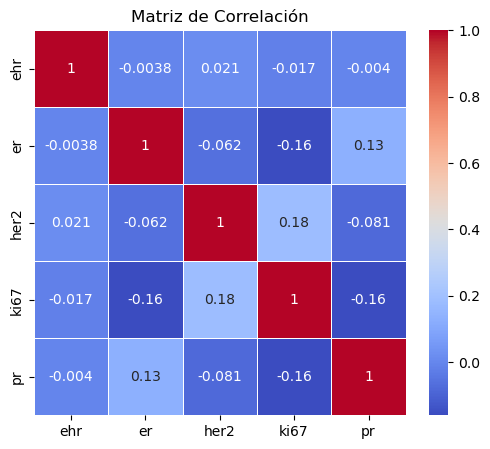

In [874]:
# Calcular la matriz de correlación
matriz_correlacion = df_json.corr()

plt.figure(figsize=(6, 5))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Matriz de Correlación')
plt.show()

Observamos que no hay ningún tipo de correlación entre las variables dadas. De hecho, la mayoría tienen una mínima correlación negativa. 

Como no existe ningún tipo de correlación entre las variables, hemos decidido imputar los nulos por el valor más común de dicha columna.
Para ello calculamos por cada columna su moda, y elegimos el primer valor (es decir, el más común) y lo reemplazamos por los nulos de dicha columna

In [875]:
# Imputación de er y pr con el valor más común
df_json['er'].fillna(df_json['er'].mode()[0], inplace=True)
df_json['pr'].fillna(df_json['pr'].mode()[0], inplace=True)

# Imputación de her2 y ki67 con el valor más común
df_json['her2'].fillna(df_json['her2'].mode()[0], inplace=True)

En cuanto a la columna 'ki67' como no es una columna binaria, sino que son porcentajes. Buscaremos una estrategia que cuadre mejor

Antes de anda, haremos un histograma para ver que rango de valores toma esta variable

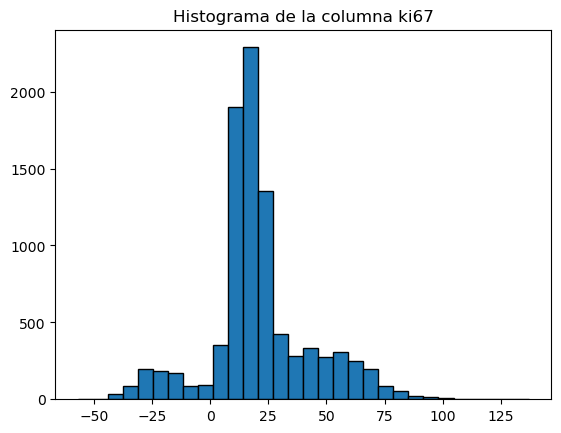

In [876]:
plt.hist(df_json['ki67'], bins=30, edgecolor='black')
plt.title('Histograma de la columna ki67')
plt.show()

Como podemos observar, tenemos varios valores menores que 0, es decir, que tienen porcentaje negativo. Un valor negativo para el índice de proliferación del tumor (ki67) es erróneo y podría ser un error en los datos o en la recopilación de los mismos. 
Asimismo, también tenemos valores mayores que 100.

De tal manera, que imputaremos estos valores negativos como 0 y los valores mayores que 100 como 100. Y volvemos a mostrar el histograma

In [877]:
df_json['ki67'] = df_json['ki67'].apply(lambda x: 0 if x < 0 else x)
df_json['ki67'] = df_json['ki67'].apply(lambda x: 100 if x > 100 else x)

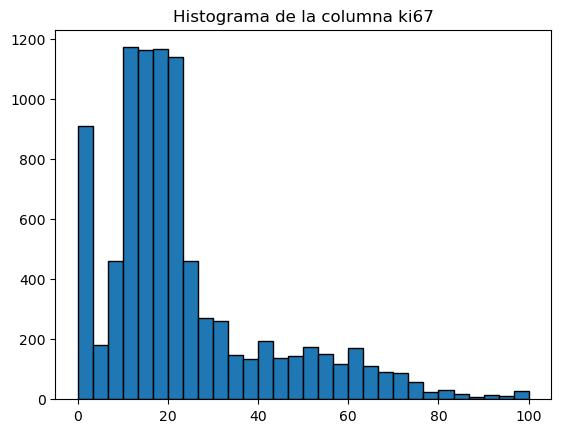

In [878]:
plt.hist(df_json['ki67'], bins=30, edgecolor='black')
plt.title('Histograma de la columna ki67')
plt.show()

Ahora que tenemos todos los datos del índice de proliferación del tumor en un rango correcto (0,100), damos paso a la decisión de la estrategia de imputación de los nulos. 

Para ellos realizamos un boxplot para ver si tenemos muchos datos atípicos

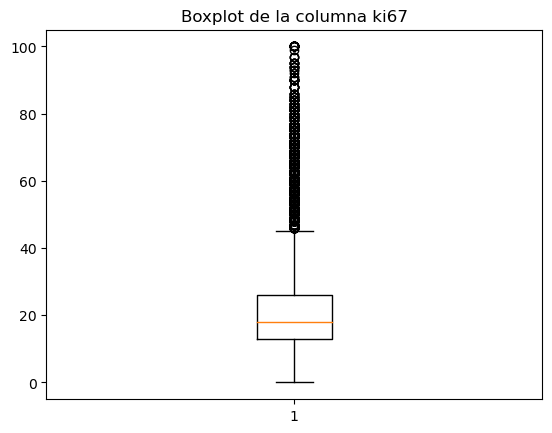

In [889]:
plt.boxplot(df_json['ki67'])
plt.title('Boxplot de la columna ki67')
plt.show()

Como podemos observar tanto en el histograma como en el boxplot, tenemos bastantes datos atípicos, por lo tanto, imputar los nulos según la media sería desacertado ya que es bastante sensible a los datos atípicos. 

Por lo tanto, decidimos imputarlo según la mediana

In [880]:
mediana = df_json['ki67'].median()
mediana

18.0

In [881]:
df_json['ki67'].fillna(mediana, inplace=True)

In [882]:
df_json

,ehr,er,her2,ki67,pr
0,10011773,0.0,0.0,19.0,1.0
1,10020495,1.0,0.0,9.0,0.0
2,10030299,1.0,0.0,18.0,1.0
3,10030824,1.0,0.0,18.0,1.0
4,10041592,0.0,0.0,65.0,0.0
...,...,...,...,...,...
9995,99966287,1.0,0.0,18.0,0.0
9996,99981192,1.0,0.0,14.0,0.0
9997,99988958,1.0,0.0,67.0,1.0
9998,99992350,0.0,0.0,16.0,0.0


In [883]:
nulos = df_json.isnull()

num_nulos_por_columna = nulos.sum()

print("Número de valores nulos por columna:")
print(num_nulos_por_columna)

Número de valores nulos por columna:
ehr     0
er      0
her2    0
ki67    0
pr      0
dtype: int64


De esta manera, hemos imputado todos los nulos. Y tenemos los datos listos para el análisis de los mismos

### Preprocesado datos_sql.csv

In [884]:
df_sql.to_csv('datos_sql.csv',)

In [885]:
df_sql.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11167 entries, 0 to 11166
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ehr                      11167 non-null  int64  
 1   n_tumor                  11167 non-null  int64  
 2   t_category               11167 non-null  object 
 3   n_category               11167 non-null  int64  
 4   m_category               11167 non-null  int64  
 5   t_category_after_neoadj  5677 non-null   object 
 6   n_category_after_neoadj  5677 non-null   float64
 7   m_category_after_neoadj  5627 non-null   float64
 8   stage_diagnosis          11167 non-null  object 
 9   stage_after_neo          6064 non-null   object 
 10  grade                    11167 non-null  int64  
 11  ductal                   6324 non-null   float64
 12  lobular                  1564 non-null   float64
 13  neoadjuvant              11167 non-null  object 
dtypes: float64(4), int64(5